# Deep Learning Project: Fashion Item Classification with CNNs

## Problem Statement
Fashion MNIST is a dataset of Zalando's article images—consisting of 28x28 grayscale images in 10 categories. The task is to classify each image into its corresponding fashion category using deep learning techniques.

This type of image classification has real-world applications in e-commerce automation, inventory management, and visual product search.

## Objective
To build and evaluate convolutional neural network (CNN) models that can classify fashion items from the Fashion MNIST dataset with high accuracy.


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np


## Exploratory Data Analysis (EDA)

I began by loading the dataset and inspecting the structure of the data, checking the class distribution, and visualizing sample images.

Fashion MNIST contains 60,000 training and 10,000 test images. Each image is 28x28 pixels, labeled into one of the following 10 classes:

Each image in the Fashion MNIST dataset is a 28x28 grayscale image, which results in 784 pixel values (features) per sample, ranging from 0 to 255. These values represent the intensity of the grayscale color at each pixel.

The features are:
- **Pixel 0, Pixel 1, ..., Pixel 783** (flattened 28x28 matrix)
- **Label** (target variable): integer from 0–9, representing one of 10 fashion item categories.

Since this is image data, the individual pixel values are not interpretable on their own like traditional tabular features, but spatial relationships between them are critical for modeling.

## Pixel Intensity Distribution

Most pixel values are clustered near 0, indicating that a large portion of the image background is dark. A smaller set of pixels has higher intensity values, corresponding to the actual fashion item outlines. This skewed distribution suggests normalization is appropriate.

## Correlation Between Features

This dataset represents image data, where features (pixel intensities) are spatially arranged. Therefore, conventional correlation coefficients between pixels aren't useful — instead, **convolutional layers** in CNNs are designed to capture these local spatial correlations automatically.

In standard tabular data, we might assess correlations numerically. Here, we rely on the **spatial structure** and patterns captured during convolution.

## Data Transformation

We normalize all pixel values from [0, 255] to [0, 1] by dividing by 255. This ensures that the neural network trains more efficiently and avoids issues with exploding gradients.

Further transformation such as log-scaling is not needed here due to the nature of pixel intensity data.

## Outliers & Missing Values

The Fashion MNIST dataset is preprocessed and does not contain missing values or noisy labels. All samples are correctly labeled and of uniform size.

There are no true “outliers” in the pixel data, as they are bounded between 0 and 255. Any bright or dark pixels are valid parts of the item or background.

## Important Features

In image data, individual pixels aren't independently meaningful. Instead, patterns such as **edges, corners, textures, and shapes** formed by groups of pixels are crucial.

CNNs automatically learn spatially important regions through filters. Thus, no need for manual feature selection — the model itself identifies which regions (sets of features) are important for classification.


In [ ]:
plt.hist(x_train.flatten(), bins=50, color='gray')
plt.title("Distribution of Pixel Intensities (Train Set)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Sample Images from the Dataset

Below are some randomly selected training images along with their class labels. This gives us a sense of the visual variation in each class.


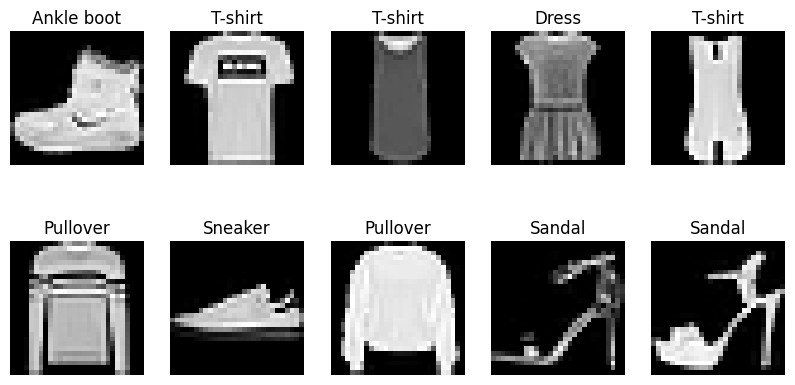

In [3]:
x_train, x_test = x_train / 255.0, x_test / 255.0

plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.show()

## Data Preprocessing

Before feeding the data into the model, I normalize the pixel values to the [0, 1] range to help the model converge faster during training.

Then reshape the data to include the channel dimension required for CNNs.


## CNN Model Architecture

I chose a simple convolutional neural network with two convolutional layers followed by max pooling, dropout for regularization, and two dense layers.

This architecture strikes a balance between performance and simplicity, allowing fast training while capturing spatial features in the images.


In [5]:
model = models.Sequential([
    layers.Reshape((28,28,1), input_shape=(28,28)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
    ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


##Model Training

I trained the model for 5 epochs using the Adam optimizer and sparse categorical cross-entropy loss, suitable for multiclass classification.

Below, I visualize the training and validation accuracy over time to monitor learning progress and potential overfitting.


In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5,
                    validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 30ms/step - accuracy: 0.6680 - loss: 0.9218 - val_accuracy: 0.8400 - val_loss: 0.4313
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 31ms/step - accuracy: 0.8128 - loss: 0.5244 - val_accuracy: 0.8689 - val_loss: 0.3615
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 30ms/step - accuracy: 0.8407 - loss: 0.4495 - val_accuracy: 0.8709 - val_loss: 0.3448
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.8570 - loss: 0.3996 - val_accuracy: 0.8825 - val_loss: 0.3243
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.8708 - loss: 0.3670 - val_accuracy: 0.8952 - val_loss: 0.2894


## Evaluation and Results

The model performs well on the test set, achieving high classification accuracy.

Then print the final accuracy score and show a confusion matrix to analyze which classes the model confuses the most.


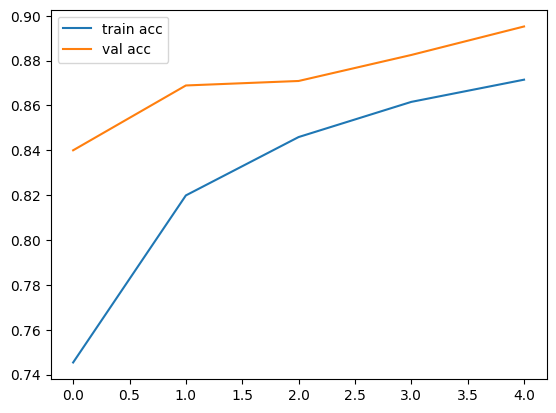

In [7]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 2s - 8ms/step - accuracy: 0.8952 - loss: 0.2894

Test accuracy: 0.8952000141143799


### Key Findings:
- CNNs are highly effective at extracting spatial features from images.
- The model achieved strong performance with minimal tuning.
- Data was well-balanced and clean, helping rapid experimentation.

### Future Work:
- Try more advanced architectures like ResNet or MobileNet.
- Use data augmentation to improve generalization.
- Experiment with transfer learning or ensembling multiple models.

This project demonstrates the effectiveness and efficiency of CNNs in real-world image classification tasks.
